# Visualizing data and parameters

This notebook helps determine the patch of the road, as well has the median of the trajectory length

## Preambles

Loading and previewing some data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('kalmaned2.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,...,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy,Vehicle_EKF_Accel,Vehicle_EKF_Theta,Vehicle_EKF_Velocity
0,0,0,1,270,569,1118847869000,51.164,112.878,6451136.708,1873294.084,...,19.89,0.00,5,0,0,0.0,0.0,0.352090,-0.000532,18.144384
1,1,1,1,271,569,1118847869100,51.153,114.878,6451138.053,1873292.603,...,19.89,0.00,5,0,0,0.0,0.0,0.606310,-0.000481,18.179593
2,2,2,1,272,569,1118847869200,51.143,116.878,6451139.397,1873291.122,...,19.89,0.00,5,0,0,0.0,0.0,0.662968,0.000942,18.265646
3,3,3,1,273,569,1118847869300,51.244,118.815,6451140.617,1873289.614,...,19.89,0.00,5,0,0,0.0,0.0,0.299653,0.001631,18.312187
4,4,4,1,274,569,1118847869400,51.234,120.814,6451141.961,1873288.133,...,19.89,1.07,5,0,0,0.0,0.0,0.289715,0.000712,18.325577


<AxesSubplot:>

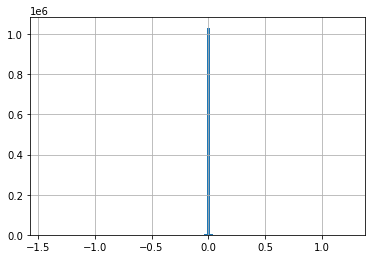

In [5]:
df['Vehicle_EKF_Theta'].hist(bins=100)

## Determining the road patch boundaries 

By plotting the histogram and the max, min of the vehicle coordinates

In [6]:
df['Local_X'].min()

0.879

In [7]:
df['Local_X'].max()

73.318

<AxesSubplot:>

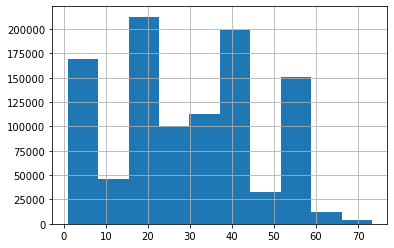

In [8]:
df['Local_X'].hist()

We see that the X of vehicles range from 0 to approximately 75ft.

<AxesSubplot:>

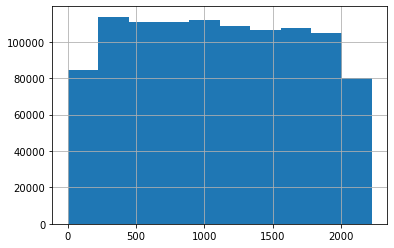

In [9]:
df['Local_Y'].hist()

In [10]:
df['Local_Y'].min()

0.0

In [11]:
df['Local_Y'].max()

2224.58

Similarly, for the Y coordinates, ranging from 0 to 2224.58ft.

## Generate a bunch of random trajectories inside the road patch

In [12]:
import pandas as pd
from ngsim_processor import NGSIM_Processor as NGSIM

if __name__ == '__main__':
    container_t = []
    container_x = []
    container_y = []
    num_of_trajs = 200
    traj_length = []

    df = pd.read_csv('kalmaned2.csv')
    ngsim = NGSIM(df)
    ngsim.set_patch(0.0, 75.0, 500.0, 1050.0) # see the notebook df_stats.py to see where these numbers come from

    for i in range(num_of_trajs):
        t, x, y = ngsim.get_trajectory_random_in_patch()
        container_t.append(t)
        container_x.append(x)
        container_y.append(y)
        traj_length.append(len(t))
        if i%50 == 0:
            print('Trajectory {:d} generated, length {:d}'.format(i, len(t)))

    print('Process completed')


# See PyCharm help at https://www.jetbrains.com/help/pycharm/

NGSIM Processor is initialized
Trajectory 0 generated, length 182
Trajectory 50 generated, length 124
Trajectory 100 generated, length 166
Trajectory 150 generated, length 156
Process completed


This is the distribution of the starting time of the trajectory (so that it can be useful to set the starting gtime of the simulator)

(array([12., 11.,  6., 10.,  4., 11., 17., 11.,  8., 15.,  4., 13., 12.,
         4.,  6., 17., 11.,  8.,  9., 11.]),
 array([ 43800.,  76425., 109050., 141675., 174300., 206925., 239550.,
        272175., 304800., 337425., 370050., 402675., 435300., 467925.,
        500550., 533175., 565800., 598425., 631050., 663675., 696300.]),
 <BarContainer object of 20 artists>)

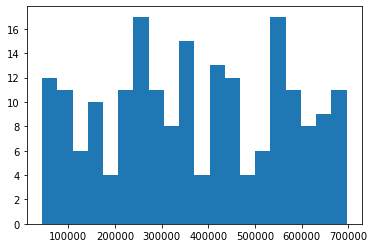

In [13]:
plt.hist(np.array([x[0] - df['Global_Time'].min() for x in container_t]), bins = 20)

Set all entrance time to zero

In [14]:
for i in range(num_of_trajs):
    container_t[i] -= container_t[i][0]
    # container_t[i] -= df['Global_Time'].min()

(array([ 2.,  1.,  6.,  6.,  8., 10.,  5.,  9., 10.,  3.,  6.,  8., 16.,
         8.,  9.,  6.,  2.,  4.,  3.,  2.,  2.,  1.,  8.,  5.,  1.,  3.,
         2.,  6.,  4.,  2.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  2.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  3.,  0.,
         1.,  0.,  3.,  2.,  1.,  1.,  1.,  2.,  5.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  2.,  2.,  1.,  0.,  1.]),
 array([100.  , 104.72, 109.44, 114.16, 118.88, 123.6 , 128.32, 133.04,
        137.76, 142.48, 147.2 , 151.92, 156.64, 161.36, 166.08, 170.8 ,
        175.52, 180.24, 184.96, 189.68, 194.4 , 199.12, 203.84, 208.56,
        213.28, 218.  , 222.72, 227.44, 232.16, 236.88, 241.6 , 246.32,
        251.04, 255.76, 260.48, 265.2 , 269.92, 274.64, 279.36, 284.08,
        288.8 , 293.52, 298.24, 302.96, 307.68, 312.4 , 317.12, 321.84,
        326.56, 331.28, 336.  , 340.72, 345.44, 350.16, 354.88, 359.6 ,
        364.32, 369.04, 373.76, 378.48, 383.2 , 387.92, 392.64, 397.36,

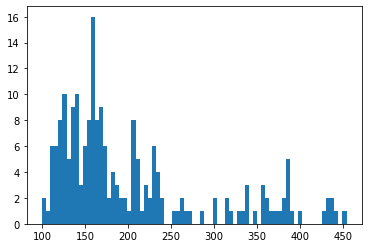

In [15]:
plt.hist(traj_length, bins=75)

From this distribution of trajectory length, it makes sense to extrapolate a little bit of trajectories to timestep 94, while trimming other longer trajectories to 94 timesteps. 

## Trim and lengthen trajectories

First, convert everything to numpy arrays

In [16]:
for i in range(num_of_trajs):
    container_t[i] = np.array(container_t[i])
    container_x[i] = np.array(container_x[i])
    container_y[i] = np.array(container_y[i])

In [17]:
from trim_and_lengthen import lengthen_trajectory_by_spline, trim_trajectory

In [18]:
median_traj_length = 150
new_t_vec = np.arange(0, median_traj_length * 100, 100)
container_x_new = container_x.copy()
container_y_new = container_y.copy()
for i in range(num_of_trajs):
    if traj_length[i] < median_traj_length:
        # Trajectory is shorter than median length, prolong the trajectory
        new_x_vec = lengthen_trajectory_by_spline(container_t[i], container_x[i], new_t_vec)
        new_y_vec = lengthen_trajectory_by_spline(container_t[i], container_y[i], new_t_vec)
        container_x_new[i] = new_x_vec
        container_y_new[i] = new_y_vec
    else:
        # Trajectory is equal or longer than the median length, trim the trajectory
        new_x_vec = trim_trajectory(container_t[i], container_x[i], new_t_vec)
        new_y_vec = trim_trajectory(container_t[i], container_y[i], new_t_vec)
        container_x_new[i] = new_x_vec
        container_y_new[i] = new_y_vec

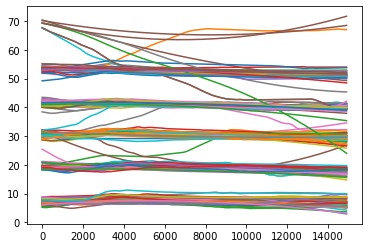

In [19]:
for i in range(num_of_trajs):
    plt.plot(new_t_vec, container_x_new[i])

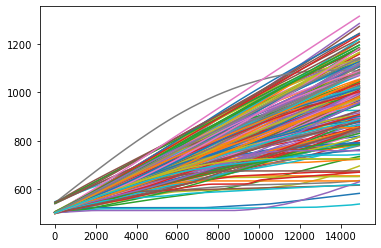

In [20]:
for i in range(num_of_trajs):
    plt.plot(new_t_vec, container_y_new[i])

Starting points of the observed trajectories. Should be close to the patch start at 500ft.

(array([ 1.,  1.,  2.,  4.,  1., 42., 46., 37., 26., 15.,  9.,  1.,  4.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.]),
 array([496.85212683, 497.48635024, 498.12057366, 498.75479707,
        499.38902049, 500.0232439 , 500.65746732, 501.29169073,
        501.92591414, 502.56013756, 503.19436097, 503.82858439,
        504.4628078 , 505.09703122, 505.73125463, 506.36547805,
        506.99970146, 507.63392488, 508.26814829, 508.90237171,
        509.53659512, 510.17081854, 510.80504195, 511.43926536,
        512.07348878, 512.70771219, 513.34193561, 513.97615902,
        514.61038244, 515.24460585, 515.87882927, 516.51305268,
        517.1472761 , 517.7814

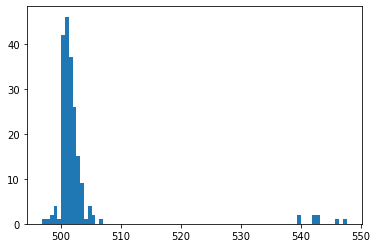

In [21]:
plt.hist(np.array([x[0] for x in container_y_new]), bins=80)

## Offsetting the trajectory starting point to zero

In [22]:
for i in range(num_of_trajs):
    container_y_new[i] = container_y_new[i] - container_y_new[i][0]
    container_x_new[i] = container_x_new[i] - container_x_new[i][0]

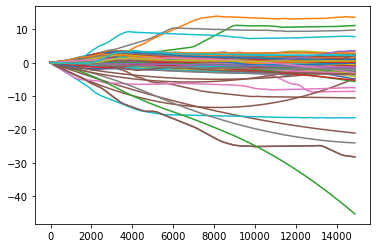

In [23]:
for i in range(num_of_trajs):
    plt.plot(new_t_vec, container_x_new[i])

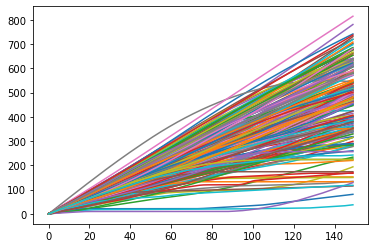

In [24]:
for i in range(num_of_trajs):
    # plt.plot(new_t_vec, container_y_new[i])
    plt.plot(container_y_new[i])

## Save these trajectories into a file

In [25]:
import pickle

file_to_store = open("trajectories.pyo", "wb")
object_to_store = {
    't_vec': new_t_vec,
    'x_vec': container_x_new,
    'y_vec': container_y_new
}

pickle.dump(object_to_store, file_to_store)
file_to_store.close()

# FPCA decomposition and distribution learning

In [26]:
import sklearn
import skfda

In [27]:
fdgrx = skfda.FDataGrid(container_x_new, new_t_vec)
# fdgry = skfda.FDataGrid(container_y_new, new_t_vec)
fdgry = skfda.FDataGrid(container_y_new, np.arange(new_t_vec.shape[0]))

## FPCA decomposition for X component

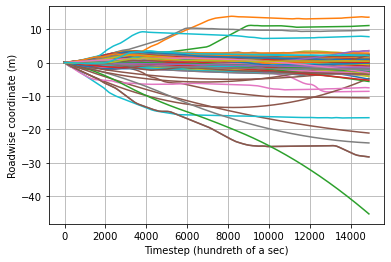

In [28]:
fdgrx.plot()
print('')
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
print('')

In [29]:
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA

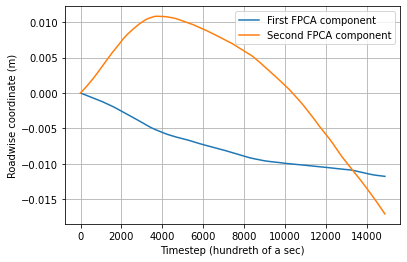

In [30]:
fpca_discretized_rw = FPCA(n_components=2)
fpca_discretized_rw.fit(fdgrx)
fpca_discretized_rw.components_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
plt.legend(['First FPCA component', 'Second FPCA component'])
print('')

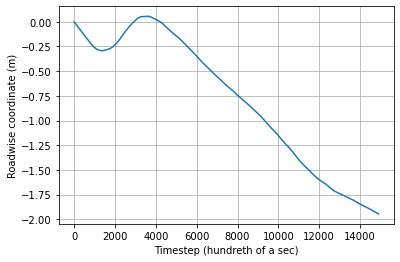

In [31]:
fpca_discretized_rw.mean_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
print('')
mean_curve = fpca_discretized_rw.mean_.data_matrix.reshape((-1))

In [32]:
fpca_discretized_rw.explained_variance_ratio_

array([0.94792867, 0.03836435])

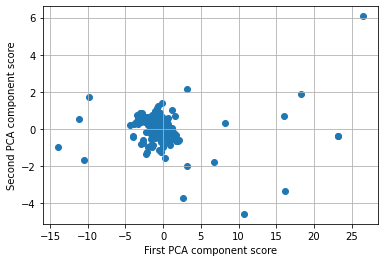

In [33]:
friendly_basis_rw = fpca_discretized_rw.components_.data_matrix.squeeze().transpose()
coeffs_rw = np.matmul(container_x_new - mean_curve, friendly_basis_rw)
plt.scatter(coeffs_rw[:,0], coeffs_rw[:,1])
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

## FPCA with Y component

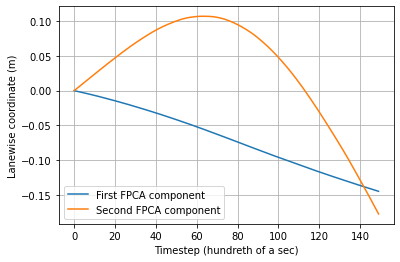

In [34]:
fpca_discretized_rw2 = FPCA(n_components=2)
fpca_discretized_rw2.fit(fdgry)
fpca_discretized_rw2.components_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Lanewise coordinate (m)')
plt.grid(True)
plt.legend(['First FPCA component', 'Second FPCA component'])
print('')

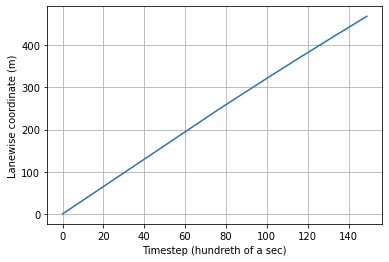

In [35]:
fpca_discretized_rw2.mean_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Lanewise coordinate (m)')
plt.grid(True)
print('')
mean_curve2 = fpca_discretized_rw2.mean_.data_matrix.reshape((-1))

In [36]:
fpca_discretized_rw2.explained_variance_ratio_

array([0.96838699, 0.02969467])

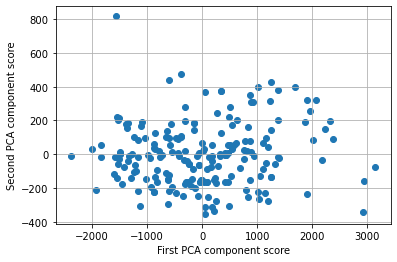

In [37]:
friendly_basis_rw2 = fpca_discretized_rw2.components_.data_matrix.squeeze().transpose()
coeffs_rw2 = np.matmul(container_y_new - mean_curve2, friendly_basis_rw2)
plt.scatter(coeffs_rw2[:,0], coeffs_rw2[:,1])
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

See how well the two components will approximate the real trajectory, we reconstruct the trajectory from the PCA loads:

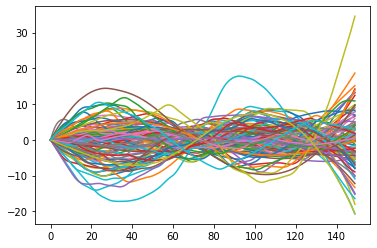

In [38]:
for i in range(100):
    plt.plot(container_y_new[i] - mean_curve2 - (friendly_basis_rw2 @ coeffs_rw2[i].reshape((2,1))).reshape(-1))

The curves show the deviation from reconstruction with actual data that generated the corresponding PCA load.

## Fitting a distribution onto the data

In [39]:
# Plotting helper function

import itertools
from scipy import linalg
import matplotlib as mpl
def plot_results(X, Y_, means, covariances, index, title):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-3.0, 3.0)
    #plt.ylim(-3.0, 3.0)
    #plt.xticks(range(-3, 4))
    #plt.xticks(range(-3, 4))
    plt.xlim(X[:,0].min(), X[:,0].max())
    plt.ylim(X[:,1].min(), X[:,1].max())
    plt.gca().set_aspect('equal')
    plt.title(title)

In [40]:
from sklearn.mixture import GaussianMixture

Learning the X functionals (lanewise coordinate) distribution

In [41]:
gm_rw = GaussianMixture(n_components=1, random_state=0).fit(coeffs_rw)

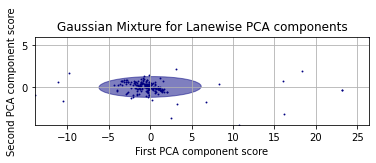

In [42]:
plot_results(coeffs_rw, gm_rw.predict(coeffs_rw), gm_rw.means_, gm_rw.covariances_, 0, 'Gaussian Mixture for Lanewise PCA components')
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

Learning the Y functionals (roadwise coordinate) distribution

In [43]:
gm_rw2 = GaussianMixture(n_components=1, random_state=0).fit(coeffs_rw2)

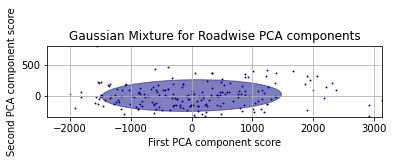

In [44]:
plot_results(coeffs_rw2, gm_rw2.predict(coeffs_rw2), gm_rw2.means_, gm_rw2.covariances_, 0, 'Gaussian Mixture for Roadwise PCA components')
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

## Learned parameters

For the X component

In [45]:
gm_rw.means_

array([[-3.55271368e-17, -5.55111512e-19]])

In [46]:
gm_rw.covariances_

array([[[19.00819352,  0.19730383],
        [ 0.19730383,  0.78293975]]])

For the Y component

In [47]:
gm_rw2.means_

array([[-2.45563569e-13, -4.37125891e-13]])

In [48]:
gm_rw2.covariances_

array([[[1097110.08508202,   14349.33460406],
        [  14349.33460406,   34168.33671733]]])

In [49]:
eigvs, _ = np.linalg.eigh(gm_rw2.covariances_)
np.sqrt(eigvs)

array([[ 184.32216661, 1047.52267789]])

Export these gaussian mixture model to a file so that we can load it to our NGSIM simulator

In [50]:
import pickle as pkl

pickle.dump({
    'cov': gm_rw2.covariances_,
    'mu': gm_rw2.means_,
    'mean_curve': mean_curve2,
    'friendly_basis': friendly_basis_rw2
}, open( "y.pkl", "wb" ) )

print('Y component Gaussian Mixture dumped to y.pkl')

pickle.dump({
    'cov': gm_rw.covariances_,
    'mu': gm_rw.means_,
    'mean_curve': mean_curve,
    'friendly_basis': friendly_basis_rw
}, open( "x.pkl", "wb" ) )

print('X component Gaussian Mixture dumped to x.pkl')

Y component Gaussian Mixture dumped to y.pkl
X component Gaussian Mixture dumped to x.pkl


# Decorrelating the PCA load distribution and scaling the eigenvalues for "circular distribution"

To ensure the correctness of the analysis on thresholding, it's wise to convert the ellipse distribution of PCA loads to a circular one (i.e., correlation = 0). We do this by performing PCA.

In [51]:
import scipy

In [52]:
y_pca_loads_covar = gm_rw2.covariances_[0]

In [53]:
y_pca_loads_R = np.linalg.inv(scipy.linalg.sqrtm(scipy.linalg.inv(y_pca_loads_covar)))
y_pca_loads_Q = np.linalg.inv(y_pca_loads_R)

In [54]:
affine_coeffs_rw2 = coeffs_rw2 @ y_pca_loads_Q.T

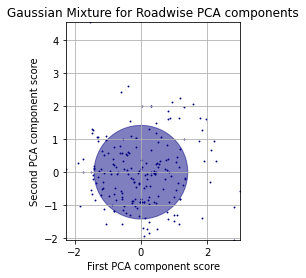

In [55]:
plot_results(affine_coeffs_rw2, gm_rw2.predict(coeffs_rw2), gm_rw2.means_ @ y_pca_loads_Q.T, np.reshape(y_pca_loads_Q @ gm_rw2.covariances_[0,:] @ y_pca_loads_Q.T, (1,2,2)), 0, 'Gaussian Mixture for Roadwise PCA components')
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

# Visualizing some likelihood curves

First, we define info_e2 = $1/\sigma_\epsilon^2$, related to the measurement noise:

In [56]:
from scipy.stats import norm
info_e2 = 10

In [57]:
lambda_max_R = np.linalg.eig(y_pca_loads_R)[0][0]

This is a code for generation of a single trajectory from the PCA load of a_sample

## With noise

[array([0., 0.]), array([5.00000000e-01, 4.89104365e-18]), array([-3.43273893e-19,  1.00000000e+00]), array([2., 2.])]


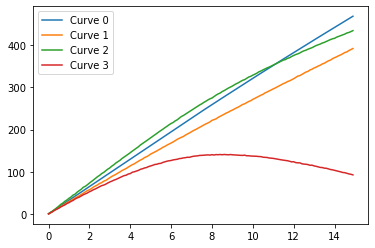

In [58]:
a_samples = [np.array([0,0]),y_pca_loads_R @ np.array([0.5,0]), y_pca_loads_R @ np.array([0,1]), y_pca_loads_R @ np.array([2,2])]
c_samples = [y_pca_loads_Q @ x for x in a_samples]
print(c_samples)
# Generate a sample trajectory curve
curvs = []
noise_samples = np.zeros((friendly_basis_rw2.shape[0],))
for index, a_sample in enumerate(a_samples):
    curv = np.zeros((friendly_basis_rw2.shape[0],))
    for i in range(friendly_basis_rw2.shape[0]):
        noise_i = norm.rvs() * np.sqrt(1./info_e2)
        noise_samples[i] = noise_i
        curv[i] = friendly_basis_rw2[i].reshape((1,2)) @ a_sample.reshape((2,1)) + noise_i * (lambda i: 0 if i == 0 else 1)(index)
        # note the noise is already included: sigma_e * e where e~N(0,1)
        # the first curve is without noise!
    curv = curv + mean_curve2
    curvs.append(curv)
    # Plot the sample curve for reference
    plt.plot(np.arange(friendly_basis_rw2.shape[0])/10., curv, label='Curve ' + str(index))
plt.legend()

Noise signature

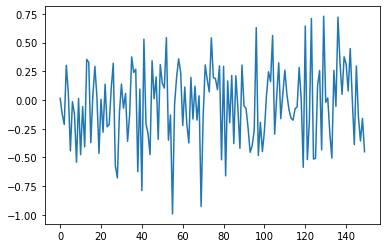

In [59]:
plt.plot(noise_samples)

## Without noise

[array([0., 0.]), array([5.00000000e-01, 4.89104365e-18]), array([-3.43273893e-19,  1.00000000e+00]), array([2., 2.])]


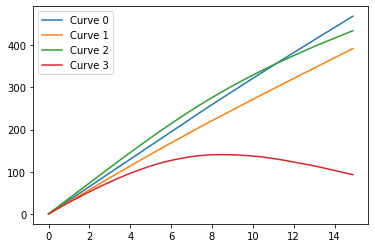

In [60]:
a_samples = [np.array([0,0]),y_pca_loads_R @ np.array([0.5,0]), y_pca_loads_R @ np.array([0,1]), y_pca_loads_R @ np.array([2,2])]
c_samples = [y_pca_loads_Q @ x for x in a_samples]
print(c_samples)
# Generate a sample trajectory curve
curvs = []
noise_samples = np.zeros((friendly_basis_rw2.shape[0],))
for index, a_sample in enumerate(a_samples):
    curv = np.zeros((friendly_basis_rw2.shape[0],))
    for i in range(friendly_basis_rw2.shape[0]):
        curv[i] = friendly_basis_rw2[i].reshape((1,2)) @ a_sample.reshape((2,1))
        # note the noise is already included: sigma_e * e where e~N(0,1)
        # the first curve is without noise!
    curv = curv + mean_curve2
    curvs.append(curv)
    # Plot the sample curve for reference
    plt.plot(np.arange(friendly_basis_rw2.shape[0])/10., curv, label='Curve ' + str(index))
plt.legend()

## Entropy curves generation

An example of measurement noise added to the curve measurement

In [61]:
from otqd.otqd import OTQD

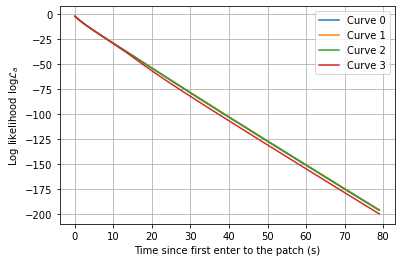

In [62]:
fix, ax = plt.subplots()
howlong=80
covar_sequence = np.zeros((howlong, 2, 2))
time_for_plot = np.arange(howlong)/10. # howlong seconds
mls = []
for index, curve in enumerate(curvs):
    # curve = curv.copy() # use the curv which is the trajectory generated from a_sample defined above
    ml_with_time_d = np.zeros(curve.shape[0],)
    otqd = OTQD(info_a = np.linalg.inv(gm_rw2.covariances_) * 1.,mu_a = gm_rw2.means_.transpose(),info_e2 = info_e2,pca_mean = mean_curve2,pca_components = friendly_basis_rw2, i_max=1)
    for k in range(howlong): # should match time_for_plot
        otqd.new_measurement(curve[k])
        ml_log_likelihood, ml_covar = otqd.calculate_log_likelihood_with_covar()
        where_ml_max = np.argmax(ml_log_likelihood)
        ml_with_time_d[k] = ml_log_likelihood[where_ml_max]
        covar_sequence[k,:,:] = ml_covar[where_ml_max,:,:]
    plt.plot(ml_with_time_d[0:howlong], label='Curve ' + str(index)) # should also match time_for_plot
    mls.append(ml_with_time_d)
plt.xlabel('Time since first enter to the patch (s)')
plt.ylabel('Log likelihood $\log \mathcal{L}_a$')
plt.legend()
plt.grid(True)

Relative entropy curve related to **the standard curve** (corresponding to $\mu=0$)

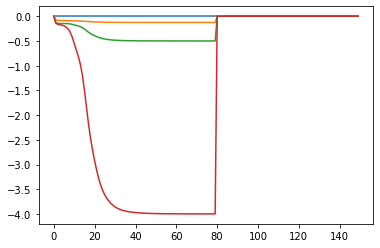

In [63]:
mlcs = []
for mlc in mls:
    ml = mlc - mls[0]
    plt.plot(ml)
    mlcs.append(ml)

# Drawing the thresholding curves

Threshold curves if no measurement noise is encountered. Basically this serves as a "simplified version" for easier understanding, but the official code is immediately below this.

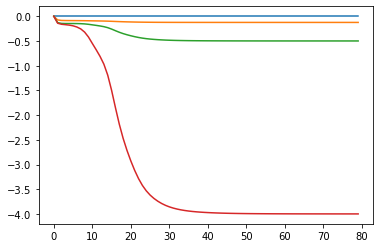

In [64]:
for a in a_samples:
    first_term = np.zeros((howlong,))
    second_term = np.zeros((howlong,1,2))
    second_term_h = np.zeros((howlong,))
    all_terms = np.zeros((howlong,))
    for i in range(howlong): 
        fbi = friendly_basis_rw2[i].reshape((2,1))
        first_term[i] = first_term[i-1] + info_e2 * np.square(fbi.T @ a)
        second_term[i,:] = (second_term[i-1,:] + fbi.T * (fbi.T @ a)) # phi.T phi.T a
        first_term_f = first_term[i].item()
        second_term_f = -(info_e2**2) * second_term[i,:] @ covar_sequence[i,:,:] @ second_term[i,:].T
        second_term_h[i] = second_term_f
        all_terms[i] = -0.5 * (first_term_f + second_term_f)
    plt.plot(all_terms)

The official draw the likelihood curve in case of no measurement noise

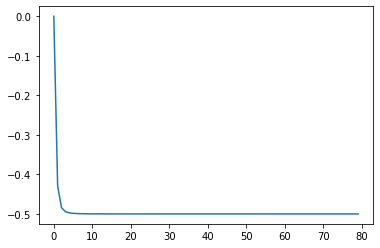

In [65]:
sps = 0
U = np.zeros((2,2))
V = np.zeros((2,2))
infs = np.zeros((2,2))
l = np.zeros((80,))
U_hist = np.zeros((80,2,2))
V_hist = np.zeros((80,2,2))
# info_e2 = 10 # use info_e2 from above (Visualizing Likelihood Curve)
for i in range(80):
    #print(i)
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    infs += info_e2 * friendly_basis_rw2[i,:].reshape((2,1)) @ friendly_basis_rw2[i,:].reshape((1,2))
    #scaled_sigma = .5 * info_e2 * (U.T @ np.linalg.inv(np.linalg.inv(gm_rw2.covariances_[0])*0.99 + infs) * info_e2 @ U - V)
    scaled_sigma = -.5 * info_e2 * (- U.T @ covar_sequence[i,:,:] * info_e2 @ U + V)
    scaled_sigma_eigs, _ = np.linalg.eig(scaled_sigma)
    #print(V @ V.T)
    l[i] = scaled_sigma_eigs[0]
    #l[i] = lambda1_sigma * info_e2 * sps - 1
    #l[i] =  2*info_e2*(lambda1_sigma * info_e2 * sps - 1) * ((lambda1_R ** 2) * sps)
    # l[i] = lambda1_R ** 2 * sps
    #print('---')
plt.plot(l[0:])

## If the bound can be analytically predicted?

In [66]:
# First perform the eigendecomposition of the sigma_m matrix
eigs, Q = np.linalg.eig(np.linalg.inv(gm_rw2.covariances_[0]))
L = np.diag(eigs)

In [67]:
(.5) * y_pca_loads_R.T @ Q @ L @ Q.T @ y_pca_loads_R

array([[ 5.00000000e-01, -4.16420112e-18],
       [ 5.50053148e-18,  5.00000000e-01]])

Looks like it's correct :)

# Effects of measurement noise

In this section, we study how the measurement noise will make the threshold curve stochastic, and thus, hopefully we can estimate with a confidence level, whether the measurements have fallen outside of the acceptance region or not.

In [68]:
from scipy.stats import chi

In [69]:
U = np.zeros((2,2))
V = np.zeros((2,2))
for i in range(howlong//2):
    print('---')
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    # print(U)
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    scaled_sigma = U.T @ covar_sequence[i,:,:] * info_e2 @ U - V
    scaled_sigma_eigs, _ = np.linalg.eig(scaled_sigma)
    zero_order_coefficient = scaled_sigma_eigs[0] + (2./info_e2) * mlcs[1][i]
    print('SSE ', (2./info_e2) * mlcs[1][i])
    # Calculate p and lambda1(G)
    p = 0
    for j in range(i):
        p += np.square(np.linalg.norm(friendly_basis_rw2[j])) # sum of ||phi_i||^2
    p = np.sqrt(p)
    G = covar_sequence[i,:,:] * info_e2 @ U
    G_eigs, _ = np.linalg.eig(G)
    # print('Sigma', covar_sequence[i,:,:])
    lambda1_G = G_eigs[0]
    #print('lambda1_G', lambda1_G)
    first_order_coefficient = 2*np.sqrt(1./info_e2)*p*lambda1_G # 2 sigma_epsilon p lambda1(G)
    sigma_eigs, _ = np.linalg.eig(covar_sequence[i,:,:] * info_e2 - np.eye(2)) 
    second_order_coefficient = np.square(p) * sigma_eigs[0] * (1./info_e2) # p^2 lambda_1(covar_seq/sigma_epsilon^2) sigma_epsilon^2
    #print('2nd order coefficient: ', second_order_coefficient)
    #print('1st order coefficient: ', first_order_coefficient)
    #print('0th order coefficient: ', zero_order_coefficient)
    delta_eq = np.square(first_order_coefficient) - 4 * second_order_coefficient * zero_order_coefficient
    #print('Delta: ', delta_eq)
    first_sol = (-first_order_coefficient + np.sqrt(delta_eq))/(2 * second_order_coefficient)
    second_sol = (-first_order_coefficient - np.sqrt(delta_eq))/(2 * second_order_coefficient)
    #print('Sol 1 (larger): ', first_sol)
    #print('Sol 2 (smaller): ', second_sol)
    # Make the variance 1
    #first_sol = first_sol * np.sqrt(info_e2)
    #second_sol = second_sol * np.sqrt(info_e2)
    #print('Sol 1 (larger): ', first_sol)
    #print('Sol 2 (smaller): ', second_sol)
    sol_intervals = []
    if second_sol > 0:
        sol_intervals.append((0,second_sol))
    sol_intervals.append((first_sol, np.inf))
    # print('Solution intervals: ', sol_intervals)
    # Throw in the chi distribution
    for interval in sol_intervals:
        if interval[0] == 0:
            print(i, 'CDF (0,x): ', chi.cdf(interval[1], i), 'Sol: ', interval[1])
        if interval[1] == np.inf:
            print(i, 'CDF (x,inf): ', chi.cdf(interval[0], i), 'Sol: ', interval[0])


---
SSE  0.0
0 CDF (x,inf):  nan Sol:  nan
---
SSE  -0.014987210726149058
1 CDF (x,inf):  1.0 Sol:  3777645719513.2666
---
SSE  -0.01695486670042854
2 CDF (x,inf):  0.003496644619797604 Sol:  0.08369912986018019
---
SSE  -0.017362835058352035
3 CDF (x,inf):  1.4188255414391269e-05 Sol:  0.037649997940904005
---
SSE  -0.017534131724022472
4 CDF (x,inf):  3.2209923977653396e-08 Sol:  0.02253140606032505
---
SSE  -0.01765367490239669
5 CDF (x,inf):  4.5944661661833374e-11 Sol:  0.015391629474958217
---
SSE  -0.017768866343703848
6 CDF (x,inf):  4.47810840564964e-14 Sol:  0.011360378722689524
---
SSE  -0.017898361275558727
7 CDF (x,inf):  3.164307249436673e-17 Sol:  0.008823659062235421
---
SSE  -0.018072380017542855
8 CDF (x,inf):  1.6926927706838102e-20 Sol:  0.007105829242396691
---
SSE  -0.01830781769966734
9 CDF (x,inf):  7.089095627164064e-24 Sol:  0.00587953786327259
---
SSE  -0.018594751090347472
10 CDF (x,inf):  2.378083410735608e-27 Sol:  0.004966566754834187
---
SSE  -0.01886676

 <ipython-input-69-f540aa10b0ef>:31: RuntimeWarning:invalid value encountered in double_scalars
 <ipython-input-69-f540aa10b0ef>:32: RuntimeWarning:invalid value encountered in double_scalars


The conclusion is by using the Cauchy - Schwarz inequality to bound, this bound is too strong. Let's try another method: linear combination of chi-squared random variables and find the CDF. Unfortunately no CDF is available, hence we have to attach this problem numerically.